<a href="https://colab.research.google.com/github/FSMahi/Python-for-Data-analysis/blob/main/Weather_Analysis_Using_Request_module(API).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**This project uses the free Open-Meteo API to fetch a 10-day weather forecast for Dhaka, processes the data using Pandas, performs cleaning, aggregation, and visualization, and stores it in a CSV format for future analysis.**
 📌 Features
  
  --Fetch 10-day forecast (temperature, precipitation, wind speed, humidity)

  --Clean and transform the weather data

  --Save to .json and .csv formats

  --Analyzing Weather with Aggregation
  
  --Visualize key metrics with plots (line chart, bar chart)

# Imprtorting Module

In [ ]:
import requests
import json
import csv
import pandas as pd


# Fetch Weather Forecast Data

In [ ]:
import requests
import pandas as pd
import json

# API URL
url = "https://api.open-meteo.com/v1/forecast"

# Updated Parameters for 10-day forecast with more metrics
params = {
    "latitude": 23.8041,
    "longitude": 90.4152,
    "daily": [
        "temperature_2m_max",
        "temperature_2m_min",
        "precipitation_sum",
        "windspeed_10m_max",
        "relative_humidity_2m_max",
        "weathercode"
    ],
    "timezone": "Asia/Dhaka",
    "forecast_days": 10
}

# Request data
response = requests.get(url, params=params)

# Check and process
if response.status_code == 200:
    data = response.json()

    # Save full response to JSON file
    with open("dhaka_10day_forecast.json", "w") as f:
        json.dump(data, f, indent=4)
        print("✅ Saved to dhaka_10day_forecast.json")

    # Optional: Display summary of dates and conditions
    print("📅 Dates:", data['daily']['time'])
    print("🌤️ Weather Codes:", data['daily']['weathercode'])
else:
    print("❌ Error fetching forecast:", response.status_code)


✅ Saved to dhaka_10day_forecast.json
📅 Dates: ['2025-05-14', '2025-05-15', '2025-05-16', '2025-05-17', '2025-05-18', '2025-05-19', '2025-05-20', '2025-05-21', '2025-05-22', '2025-05-23']
🌤️ Weather Codes: [80, 80, 95, 80, 80, 96, 95, 51, 51, 3]


# Convert JSON to DataFrame

In [ ]:
import json
import pandas as pd

# Step 1: Load the saved JSON file
with open("dhaka_10day_forecast.json", "r") as f:
    data = json.load(f)

# Step 2: Extract 'daily' section
daily_data = data["daily"]

# Step 3: Convert to DataFrame
df = pd.DataFrame(daily_data)

# Optional: Rename columns for clarity
df.rename(columns={
    "time": "Date",
    "temperature_2m_max": "Max Temp (°C)",
    "temperature_2m_min": "Min Temp (°C)",
    "precipitation_sum": "Precipitation (mm)",
    "windspeed_10m_max": "Max Wind Speed (km/h)",
    "relative_humidity_2m_max": "Max Humidity (%)",
    "weathercode": "Weather Code"
}, inplace=True)

# Step 4: Show the DataFrame
print("📊 10-Day Weather Forecast for Dhaka:")
print(df)


📊 10-Day Weather Forecast for Dhaka:
         Date  Max Temp (°C)  Min Temp (°C)  Precipitation (mm)  \
0  2025-05-14           37.6           27.8                 2.9   
1  2025-05-15           36.9           27.9                 2.4   
2  2025-05-16           35.4           27.8                 6.8   
3  2025-05-17           36.1           27.6                 0.6   
4  2025-05-18           35.5           27.6                 7.6   
5  2025-05-19           35.8           27.2                12.9   
6  2025-05-20           34.1           27.4                16.4   
7  2025-05-21           35.7           27.0                 6.0   
8  2025-05-22           34.7           26.4                 2.7   
9  2025-05-23           35.7           27.5                 0.0   

   Max Wind Speed (km/h)  Max Humidity (%)  Weather Code  
0                   11.7                91            80  
1                   11.5                85            80  
2                   10.5                89      

# Save to CSV

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv("dhaka_10day_forecast.csv", index=False)

print("📁 Saved DataFrame to 'dhaka_10day_forecast.csv'")


📁 Saved DataFrame to 'dhaka_10day_forecast.csv'


**Read CSV as data frame**

In [ ]:
forecast_df = pd.read_csv('dhaka_10day_forecast.csv')
forecast_df.head()

,Date,Max Temp (°C),Min Temp (°C),Precipitation (mm),Max Wind Speed (km/h),Max Humidity (%),Weather Code
0,2025-05-14,37.6,27.8,2.9,11.7,91,80
1,2025-05-15,36.9,27.9,2.4,11.5,85,80
2,2025-05-16,35.4,27.8,6.8,10.5,89,95
3,2025-05-17,36.1,27.6,0.6,10.0,90,80
4,2025-05-18,35.5,27.6,7.6,7.1,88,80


In [ ]:
type(forecast_df)

pandas.core.frame.DataFrame

In [ ]:
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   10 non-null     object 
 1   Max Temp (°C)          10 non-null     float64
 2   Min Temp (°C)          10 non-null     float64
 3   Precipitation (mm)     10 non-null     float64
 4   Max Wind Speed (km/h)  10 non-null     float64
 5   Max Humidity (%)       10 non-null     int64  
 6   Weather Code           10 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 692.0+ bytes


# Data Handling

In [ ]:
forecast_df.describe()

,Max Temp (°C),Min Temp (°C),Precipitation (mm),Max Wind Speed (km/h),Max Humidity (%),Weather Code
count,10.000000,10.000000,10.000000,10.000000,10.0000,10.000000
mean,35.750000,27.420000,5.830000,11.100000,89.6000,71.100000
std,0.993591,0.454117,5.346868,3.181195,2.1187,28.915394
min,34.100000,26.400000,0.000000,7.100000,85.0000,3.000000
25%,35.425000,27.250000,2.475000,9.100000,88.2500,58.250000
50%,35.700000,27.550000,4.450000,10.350000,90.5000,80.000000
75%,36.025000,27.750000,7.400000,11.650000,91.0000,91.250000
max,37.600000,27.900000,16.400000,17.400000,92.0000,96.000000


In [ ]:
forecast_df.columns

Index(['Date', 'Max Temp (°C)', 'Min Temp (°C)', 'Precipitation (mm)',
       'Max Wind Speed (km/h)', 'Max Humidity (%)', 'Weather Code'],
      dtype='object')

In [ ]:
forecast_df.shape

(10, 7)

Checking Null values from each columns

In [ ]:
forecast_df.isnull().sum()

,0
Date,0
Max Temp (°C),0
Min Temp (°C),0
Precipitation (mm),0
Max Wind Speed (km/h),0
Max Humidity (%),0
Weather Code,0


In [ ]:
forecast_df['Date']

,Date
0,2025-05-14
1,2025-05-15
2,2025-05-16
3,2025-05-17
4,2025-05-18
5,2025-05-19
6,2025-05-20
7,2025-05-21
8,2025-05-22
9,2025-05-23


In [ ]:
forecast_df['Max Humidity (%)'].first_valid_index()

0

# Clean & Format Data

**Remove duplicate value**

In [ ]:
forecast_df.drop_duplicates(inplace=True)

Handling missing Values

In [ ]:
forecast_df.fillna(method='ffill', inplace=True)

<ipython-input-60-128db361555b>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forecast_df.fillna(method='ffill', inplace=True)


Formating data type

In [ ]:
forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])

In [ ]:
forecast_df['Date']

,Date
0,2025-05-14
1,2025-05-15
2,2025-05-16
3,2025-05-17
4,2025-05-18
5,2025-05-19
6,2025-05-20
7,2025-05-21
8,2025-05-22
9,2025-05-23


In [ ]:
forecast_df.loc[0, 'Date'].day_name()

'Wednesday'

In [ ]:
forecast_df.loc[4, 'Date'].day_name()

'Sunday'

In [ ]:
type(forecast_df.loc[0, 'Date'])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   10 non-null     datetime64[ns]
 1   Max Temp (°C)          10 non-null     float64       
 2   Min Temp (°C)          10 non-null     float64       
 3   Precipitation (mm)     10 non-null     float64       
 4   Max Wind Speed (km/h)  10 non-null     float64       
 5   Max Humidity (%)       10 non-null     int64         
 6   Weather Code           10 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 692.0 bytes


# Analyzing Weather
Data Analysis with Aggregation

**Average Temperatures**

In [ ]:
avg_max_temp = forecast_df["Max Temp (°C)"].mean()
avg_min_temp = forecast_df["Min Temp (°C)"].mean()

print(f"🌡️ Average Max Temp over 10 days: {avg_max_temp:.2f}°C")
print(f"🌡️ Average Min Temp over 10 days: {avg_min_temp:.2f}°C")

🌡️ Average Max Temp over 10 days: 35.75°C
🌡️ Average Min Temp over 10 days: 27.42°C


**Total and Average Precipitation**

In [ ]:
total_rain = forecast_df["Precipitation (mm)"].sum()
avg_rain = forecast_df["Precipitation (mm)"].mean()

print(f"☔ Total Precipitation over 10 days: {total_rain:.2f} mm")
print(f"☔ Average Daily Precipitation: {avg_rain:.2f} mm")

☔ Total Precipitation over 10 days: 58.30 mm
☔ Average Daily Precipitation: 5.83 mm


**Max Wind Speed and Humidity Observed**

In [ ]:
max_wind = forecast_df["Max Wind Speed (km/h)"].max()
max_humidity = forecast_df["Max Humidity (%)"].max()

print(f"🍃 Highest Wind Speed: {max_wind} km/h")
print(f"💦 Highest Humidity: {max_humidity}%")

🍃 Highest Wind Speed: 17.4 km/h
💦 Highest Humidity: 92%


**Hottest and Coolest Days**

In [ ]:
hottest_day = forecast_df[forecast_df["Max Temp (°C)"] == forecast_df["Max Temp (°C)"].max()]["Date"].values[0]
coolest_day = forecast_df[forecast_df["Min Temp (°C)"] == forecast_df["Min Temp (°C)"].min()]["Date"].values[0]

print(f"🔥 Hottest Day: {hottest_day}")
print(f"❄️ Coolest Night: {coolest_day}")


🔥 Hottest Day: 2025-05-14T00:00:00.000000000
❄️ Coolest Night: 2025-05-22T00:00:00.000000000


 **Count of Rainy Days**

In [ ]:
rainy_days = forecast_df[forecast_df["Precipitation (mm)"] > 5].shape[0]
print(f"🌧️ Days with Rain Forecast: {rainy_days} out of 10")

🌧️ Days with Rain Forecast: 5 out of 10


In [ ]:
forecast_df

,Date,Max Temp (°C),Min Temp (°C),Precipitation (mm),Max Wind Speed (km/h),Max Humidity (%),Weather Code
0,2025-05-14,37.6,27.8,2.9,11.7,91,80
1,2025-05-15,36.9,27.9,2.4,11.5,85,80
2,2025-05-16,35.4,27.8,6.8,10.5,89,95
3,2025-05-17,36.1,27.6,0.6,10.0,90,80
4,2025-05-18,35.5,27.6,7.6,7.1,88,80
5,2025-05-19,35.8,27.2,12.9,8.3,91,96
6,2025-05-20,34.1,27.4,16.4,8.8,91,95
7,2025-05-21,35.7,27.0,6.0,10.2,92,51
8,2025-05-22,34.7,26.4,2.7,15.5,91,51
9,2025-05-23,35.7,27.5,0.0,17.4,88,3


# Data Visulization

In [ ]:
import matplotlib.pyplot as plt

**Plot temperature trends**

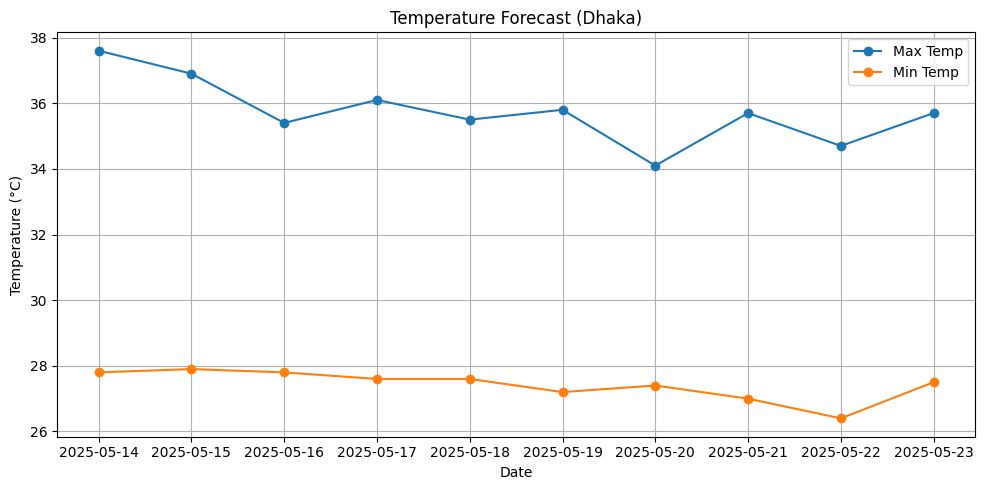

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(forecast_df["Date"], forecast_df["Max Temp (°C)"], label="Max Temp", marker='o')
plt.plot(forecast_df["Date"], forecast_df["Min Temp (°C)"], label="Min Temp", marker='o')
plt.title("Temperature Forecast (Dhaka)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Plot humidity & wind speed**

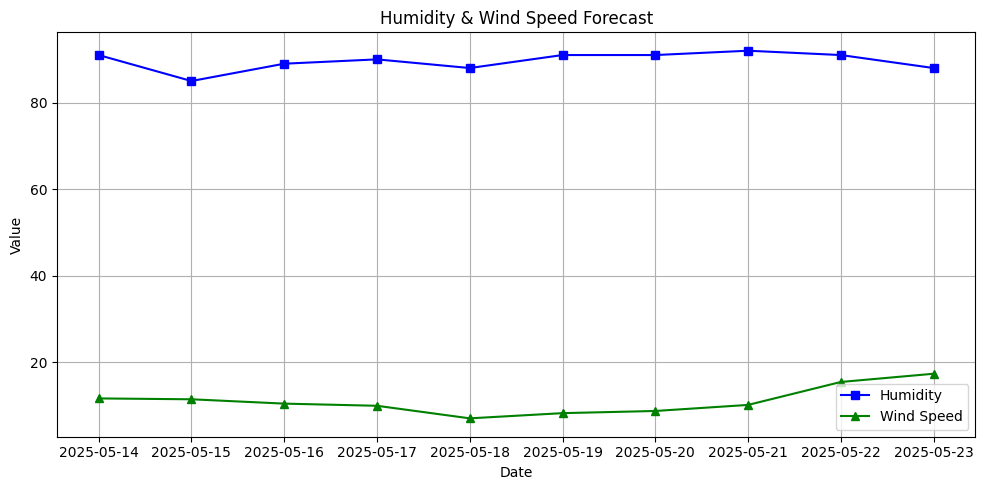

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(forecast_df["Date"], forecast_df["Max Humidity (%)"], label="Humidity", color="blue", marker='s')
plt.plot(forecast_df["Date"], forecast_df["Max Wind Speed (km/h)"], label="Wind Speed", color="green", marker='^')
plt.title("Humidity & Wind Speed Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Plot precipitation**

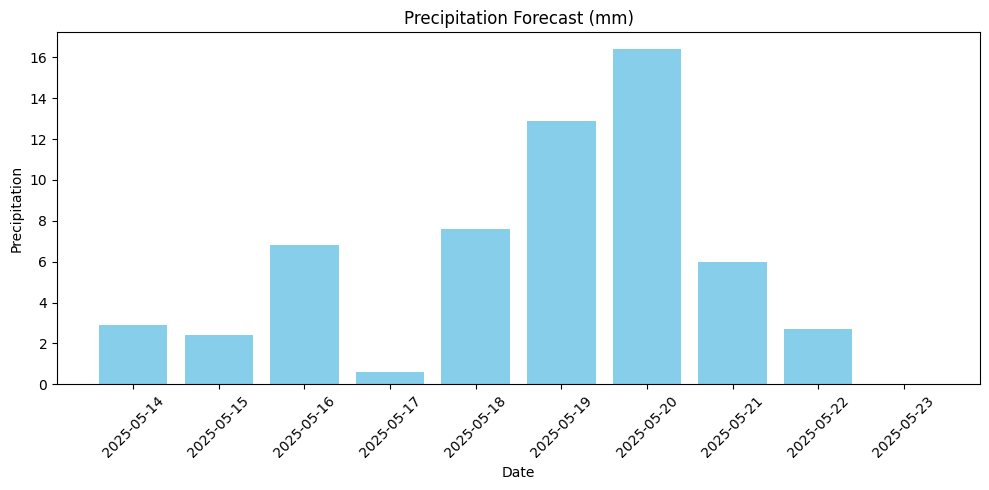

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(forecast_df["Date"], forecast_df["Precipitation (mm)"], color="skyblue")
plt.title("Precipitation Forecast (mm)")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Try this with Seaborn

In [ ]:
import seaborn as sns

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

**Line Plot: Max and Min Temperature**

<ipython-input-50-43b36031d5d4>:9: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout();


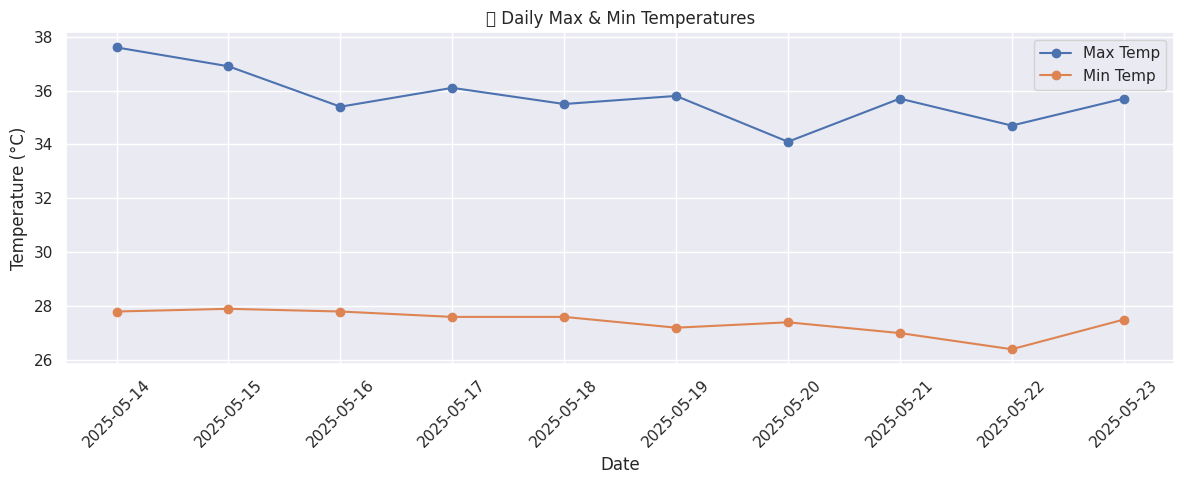

In [ ]:
plt.figure(figsize=(12, 5));
plt.plot(df["Date"], df["Max Temp (°C)"], marker='o', label="Max Temp");
plt.plot(df["Date"], df["Min Temp (°C)"], marker='o', label="Min Temp");
plt.title("🌡️ Daily Max & Min Temperatures");
plt.xlabel("Date");
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45);
plt.legend();
plt.tight_layout();
plt.show();

**Bar Chart: Daily Precipitation**

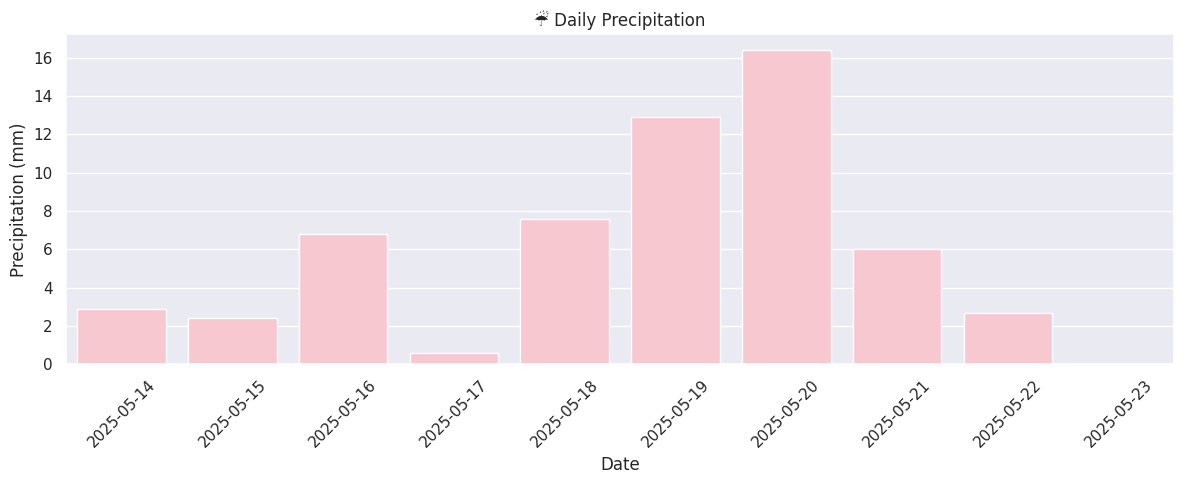

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(x="Date", y="Precipitation (mm)", data=df, color="pink")
plt.title("☔ Daily Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()